In [28]:
# sphinx_gallery_thumbnail_number = 7

# Authors: Robert Luke <mail@robertluke.net>
#
# License: BSD (3-clause)

import os
from itertools import compress

import matplotlib.pyplot as plt
import mne
import numpy as np
from mne.preprocessing.nirs import optical_density, temporal_derivative_distribution_repair

from mne_nirs.preprocessing import peak_power, scalp_coupling_index_windowed
from mne_nirs.visualisation import plot_timechannel_quality_metric
#plt.ioff()
from preprocessing_functions import signal_quality_1_subject



In [29]:
datapath = 'subjects/sub-19/ses-02/nirs'
save_path = 'results/sub-19/ses-02'
subj_id = 'sub-19'
session = 'ses-02'

In [30]:
raw_intensity = mne.io.read_raw_nirx(datapath).load_data()
raw_od = optical_density(raw_intensity)
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od, ppf=6.1)
""" fig, ax = plt.subplots(constrained_layout=True)
s = mne_nirs.experimental_design.create_boxcar(raw_intensity, stim_dur=5.0)
ax.plot(raw_intensity.times, s[:, 2])
ax.plot(design_matrix["3.0"])
ax.legend(["Stimulus", "Expected Response"])
ax.set(xlim=(0, 300), xlabel="Time (s)", ylabel="Amplitude")
plt.show()  """

Loading subjects/sub-19/ses-02/nirs
Reading 0 ... 7685  =      0.000 ...  1475.520 secs...


C:\Users\sarab\AppData\Local\Temp\ipykernel_15608\2077476691.py:1: RuntimeWarning: Extraction of measurement date from NIRX file failed. This can be caused by files saved in certain locales (currently only ['en_US.utf8', 'de_DE', 'fr_FR', 'it_IT'] supported). Please report this as a github issue. The date is being set to January 1st, 2000, instead of '"21. feb 2025""12:53:22.663"'.
  raw_intensity = mne.io.read_raw_nirx(datapath).load_data()


' fig, ax = plt.subplots(constrained_layout=True)\ns = mne_nirs.experimental_design.create_boxcar(raw_intensity, stim_dur=5.0)\nax.plot(raw_intensity.times, s[:, 2])\nax.plot(design_matrix["3.0"])\nax.legend(["Stimulus", "Expected Response"])\nax.set(xlim=(0, 300), xlabel="Time (s)", ylabel="Amplitude")\nplt.show()  '

In [31]:
raw_haemo.info['ch_names']

['S1_D1 hbo',
 'S1_D1 hbr',
 'S2_D1 hbo',
 'S2_D1 hbr',
 'S2_D13 hbo',
 'S2_D13 hbr',
 'S3_D1 hbo',
 'S3_D1 hbr',
 'S3_D2 hbo',
 'S3_D2 hbr',
 'S4_D2 hbo',
 'S4_D2 hbr',
 'S4_D3 hbo',
 'S4_D3 hbr',
 'S4_D14 hbo',
 'S4_D14 hbr',
 'S5_D2 hbo',
 'S5_D2 hbr',
 'S5_D3 hbo',
 'S5_D3 hbr',
 'S5_D4 hbo',
 'S5_D4 hbr',
 'S5_D5 hbo',
 'S5_D5 hbr',
 'S5_D15 hbo',
 'S5_D15 hbr',
 'S6_D6 hbo',
 'S6_D6 hbr',
 'S6_D8 hbo',
 'S6_D8 hbr',
 'S6_D16 hbo',
 'S6_D16 hbr',
 'S7_D6 hbo',
 'S7_D6 hbr',
 'S7_D7 hbo',
 'S7_D7 hbr',
 'S7_D8 hbo',
 'S7_D8 hbr',
 'S8_D7 hbo',
 'S8_D7 hbr',
 'S8_D8 hbo',
 'S8_D8 hbr',
 'S8_D17 hbo',
 'S8_D17 hbr',
 'S9_D8 hbo',
 'S9_D8 hbr',
 'S10_D9 hbo',
 'S10_D9 hbr',
 'S10_D10 hbo',
 'S10_D10 hbr',
 'S10_D11 hbo',
 'S10_D11 hbr',
 'S10_D12 hbo',
 'S10_D12 hbr',
 'S10_D18 hbo',
 'S10_D18 hbr',
 'S11_D11 hbo',
 'S11_D11 hbr',
 'S11_D12 hbo',
 'S11_D12 hbr',
 'S11_D19 hbo',
 'S11_D19 hbr',
 'S12_D1 hbo',
 'S12_D1 hbr',
 'S12_D20 hbo',
 'S12_D20 hbr']

In [32]:

cropped_intensity, bad_channels_df, raw_haemo_cropped, raw_haemo_original, cropped_corrected_od, original_corrected_od= signal_quality_1_subject(datapath, save_path, subj_id, session)

# close all the figures
#plt.close('all')

Processing subject sub-19, session ses-02...
Loading NIRS data...
Loading subjects/sub-19/ses-02/nirs
Reading 0 ... 7685  =      0.000 ...  1475.520 secs...


c:\Users\sarab\Desktop\THESIS\Tutorial MNE\preprocessing_functions.py:23: RuntimeWarning: Extraction of measurement date from NIRX file failed. This can be caused by files saved in certain locales (currently only ['en_US.utf8', 'de_DE', 'fr_FR', 'it_IT'] supported). Please report this as a github issue. The date is being set to January 1st, 2000, instead of '"21. feb 2025""12:53:22.663"'.
  raw_intensity_original = mne.io.read_raw_nirx(datapath).load_data()


Renaming annotations...
Extracting event timings...
Used Annotations descriptions: [np.str_('XStart'), np.str_('XStop')]
Used Annotations descriptions: [np.str_('Control'), np.str_('Noise'), np.str_('Speech'), np.str_('XStart'), np.str_('XStop')]
Original duration: 1475.52 seconds
Cropping the dataset...
Cropped duration: 1190.21 seconds
Removing break annotations for the orginal raw...
Removing break annotations for the cropped raw...
Applying optical density and correction...
Computing Scalp Coupling Index (SCI)...
Identifying bad channels...
sub-19 - ses-02: 6 bad channels detected: ['S6_D16 785', 'S6_D16 830', 'S7_D8 785', 'S7_D8 830', 'S10_D18 785', 'S10_D18 830']
Removing bad channels...
Bad channels successfully removed.
Converting to hemoglobin concentration...
Plotting pre-filtering power spectral density...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 786.432 (s)
Plotting power spectral density (dB=True).
NOTE: plot

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Computing quality metrics...
Processing complete for sub-19 - ses-02


Used Annotations descriptions: [np.str_('Control'), np.str_('Noise'), np.str_('Speech')]


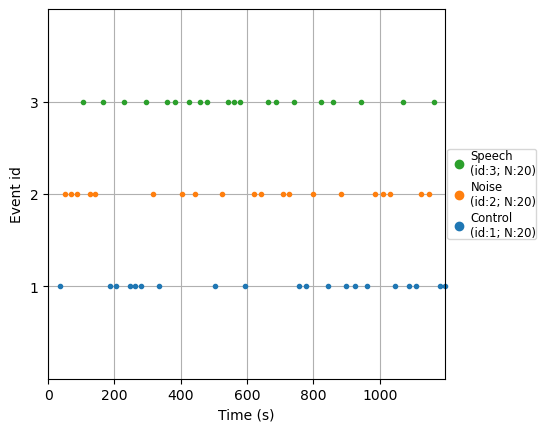

In [33]:
events, event_dict = mne.events_from_annotations(raw_haemo_cropped)
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw_haemo_cropped.info["sfreq"])

Used Annotations descriptions: [np.str_('Control'), np.str_('Noise'), np.str_('Speech')]


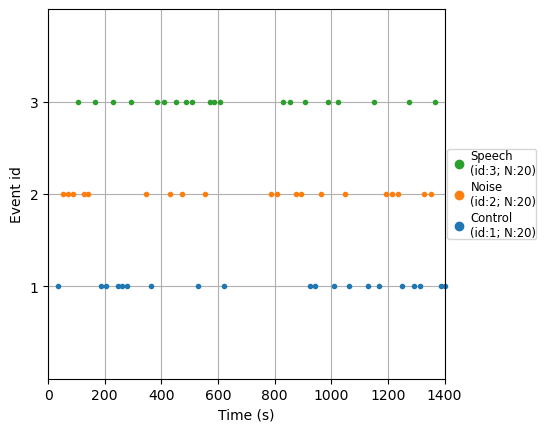

In [34]:
events, event_dict = mne.events_from_annotations(raw_haemo_original)
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw_haemo_original.info["sfreq"])

Used Annotations descriptions: [np.str_('Control'), np.str_('Noise'), np.str_('Speech')]


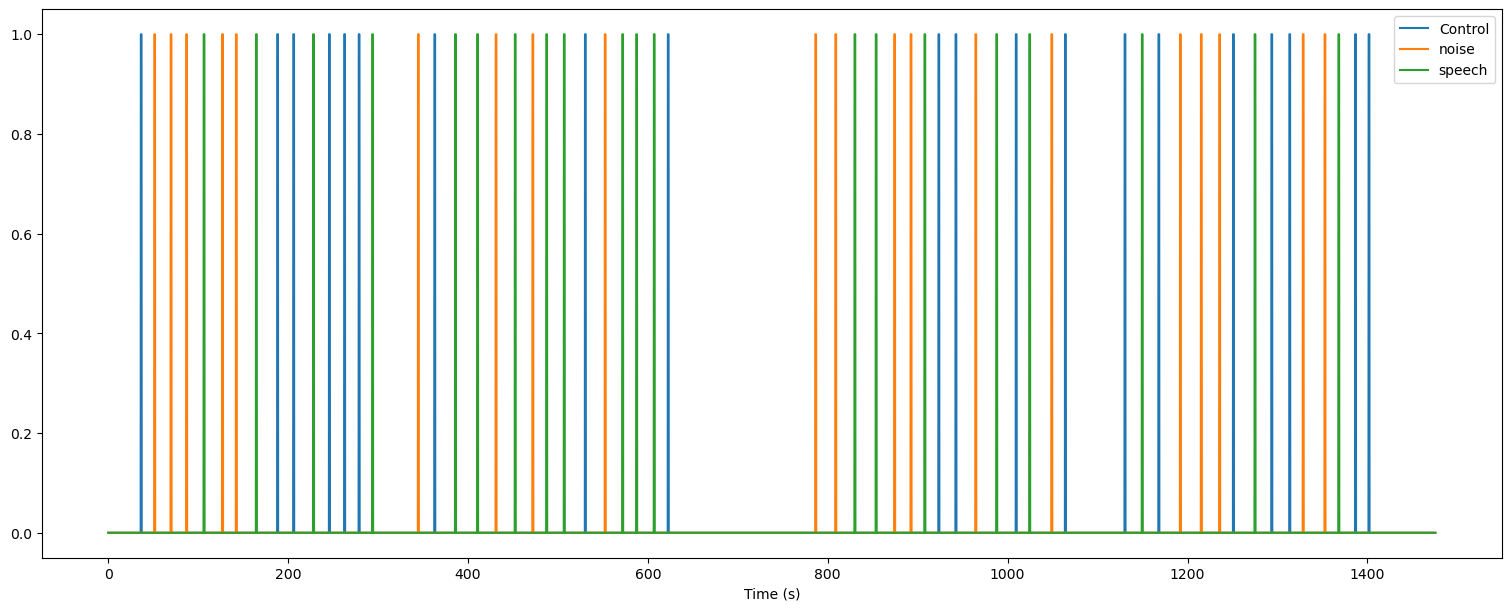

In [35]:
import mne_nirs
from mne_nirs.channels import get_long_channels, get_short_channels, picks_pair_to_idx
from mne_nirs.experimental_design import make_first_level_design_matrix
from mne_nirs.statistics import run_glm
s = mne_nirs.experimental_design.create_boxcar(raw_haemo_original)

fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
ax.plot(raw_haemo_original.times, s)
ax.legend(["Control", "noise", "speech"], loc="upper right")
ax.set_xlabel("Time (s)")
# show the plot
plt.show()

In [36]:
design_matrix = make_first_level_design_matrix(raw_haemo_original,
                                                   drift_model='cosine',
                                                   hrf_model='spm',
                                                   stim_dur=5) 

In [37]:
""" # Cut out just the short channels for creating a GLM regressor
short_chans = get_short_channels(raw_haemo_original)
raw_haemo_original = get_long_channels(raw_haemo_original)

# Create a design matrix
design_matrix = make_first_level_design_matrix(
    raw_haemo,
    hrf_model="fir",
    stim_dur=1.0,
    fir_delays=range(10),
    drift_model="cosine",
    high_pass=0.01,
    oversampling=1,
)
# Add short channels as regressor in GLM
for chan in range(len(short_chans.ch_names)):
    design_matrix[f"short_{chan}"] = short_chans.get_data(chan).T """

' # Cut out just the short channels for creating a GLM regressor\nshort_chans = get_short_channels(raw_haemo_original)\nraw_haemo_original = get_long_channels(raw_haemo_original)\n\n# Create a design matrix\ndesign_matrix = make_first_level_design_matrix(\n    raw_haemo,\n    hrf_model="fir",\n    stim_dur=1.0,\n    fir_delays=range(10),\n    drift_model="cosine",\n    high_pass=0.01,\n    oversampling=1,\n)\n# Add short channels as regressor in GLM\nfor chan in range(len(short_chans.ch_names)):\n    design_matrix[f"short_{chan}"] = short_chans.get_data(chan).T '

In [38]:
short_chs = get_short_channels(raw_haemo_original)

design_matrix["ShortHbO"] = np.mean(
    short_chs.copy().pick(picks="hbo").get_data(), axis=0
)

design_matrix["ShortHbR"] = np.mean(
    short_chs.copy().pick(picks="hbr").get_data(), axis=0
)

C:\Users\sarab\AppData\Local\Temp\ipykernel_15608\3582385381.py:4: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  fig = plot_design_matrix(design_matrix, ax=ax1)


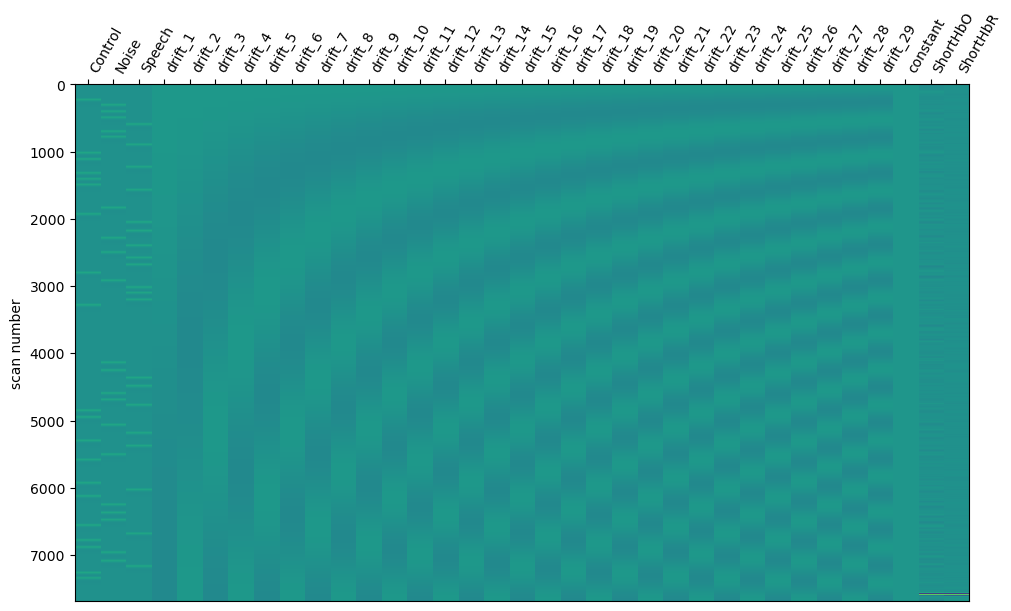

In [39]:
from nilearn.plotting import plot_design_matrix

fig, ax1 = plt.subplots(figsize=(10, 6), constrained_layout=True)
fig = plot_design_matrix(design_matrix, ax=ax1)

plt.show()


In [40]:
glm_est = run_glm(raw_haemo_original, design_matrix)

Used Annotations descriptions: [np.str_('Control'), np.str_('Noise'), np.str_('Speech')]


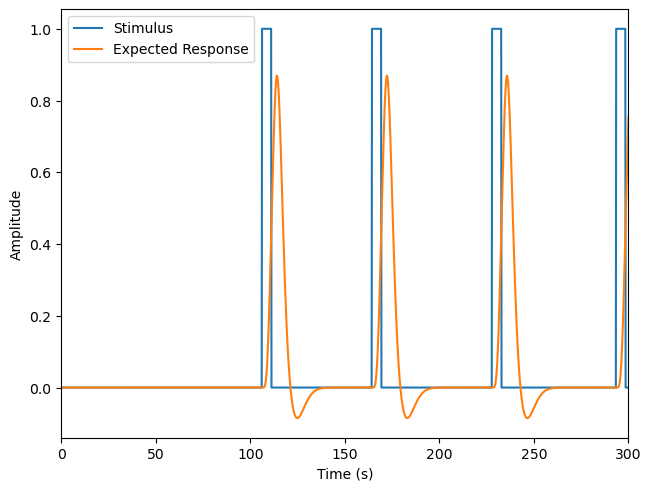

In [41]:
fig, ax = plt.subplots(constrained_layout=True)
s = mne_nirs.experimental_design.create_boxcar(raw_haemo_original, stim_dur=5.0)
ax.plot(raw_haemo_original.times, s[:, 2])
ax.plot(design_matrix["Speech"])
ax.legend(["Stimulus", "Expected Response"])
ax.set(xlim=(0, 300), xlabel="Time (s)", ylabel="Amplitude")
plt.show()

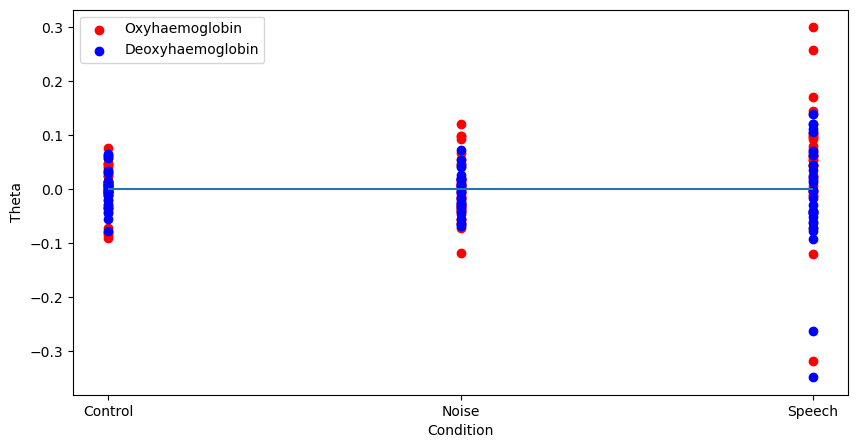

In [42]:
glm_est.scatter()
plt.show()

In [43]:
""" # Define channels in each region of interest
left = [[4, 2], [4, 3], [5, 2], [5, 3], [5, 4], [5, 5]]
right = [[10, 9], [10, 10], [10, 11], [10, 12], [11, 11], [11, 12]]
back = [[6, 6], [6, 8], [7, 6], [7, 7], [7, 8], [8, 7], [8, 8], [9, 8]]
front = [[1, 1], [2, 1], [3, 1], [3, 2], [12, 1]]
raw_haemo = raw_haemo_original

# Then generate the correct indices for each pair
groups = dict(STG_Left=picks_pair_to_idx(raw_haemo, left, on_missing='ignore'),
                STG_Right=picks_pair_to_idx(raw_haemo, right, on_missing='ignore'),
                Occipital=picks_pair_to_idx(raw_haemo, back, on_missing='ignore'),
                Frontal=picks_pair_to_idx(raw_haemo, front, on_missing='ignore'))

# Compute region of interest results
roi = glm_est.to_dataframe_region_of_interest(groups,
                                                design_matrix.columns,
                                                demographic_info=True)
# Add the participant ID to the dataframes
roi["ID"] = 19

# Convert to uM for nicer plotting below.
roi["theta"] = [t * 1.e6 for t in roi["theta"]] """

' # Define channels in each region of interest\nleft = [[4, 2], [4, 3], [5, 2], [5, 3], [5, 4], [5, 5]]\nright = [[10, 9], [10, 10], [10, 11], [10, 12], [11, 11], [11, 12]]\nback = [[6, 6], [6, 8], [7, 6], [7, 7], [7, 8], [8, 7], [8, 8], [9, 8]]\nfront = [[1, 1], [2, 1], [3, 1], [3, 2], [12, 1]]\nraw_haemo = raw_haemo_original\n\n# Then generate the correct indices for each pair\ngroups = dict(STG_Left=picks_pair_to_idx(raw_haemo, left, on_missing=\'ignore\'),\n                STG_Right=picks_pair_to_idx(raw_haemo, right, on_missing=\'ignore\'),\n                Occipital=picks_pair_to_idx(raw_haemo, back, on_missing=\'ignore\'),\n                Frontal=picks_pair_to_idx(raw_haemo, front, on_missing=\'ignore\'))\n\n# Compute region of interest results\nroi = glm_est.to_dataframe_region_of_interest(groups,\n                                                design_matrix.columns,\n                                                demographic_info=True)\n# Add the participant ID to the dataf

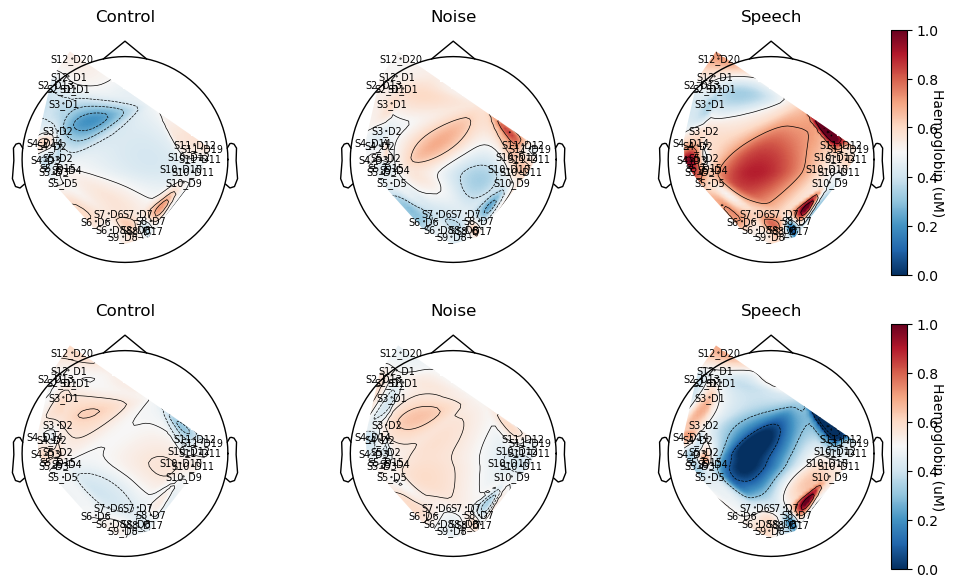

In [44]:
glm_est.plot_topo(conditions=["Control","Noise", "Speech"])

In [45]:
df_theta = glm_est.to_dataframe()


In [46]:
df_theta.columns

Index(['Condition', 'df', 'mse', 'p_value', 'se', 't', 'theta', 'Source',
       'Detector', 'Chroma', 'Significant', 'ch_name'],
      dtype='object', name='variable')

In [47]:
df_theta.head()


variable,Condition,df,mse,p_value,se,t,theta,Source,Detector,Chroma,Significant,ch_name
630,Control,35.0,2.606845e-15,6.134502e-01,2.625435e-08,-0.509715,-1.338224e-08,1,1,hbo,False,S1_D1 hbo
631,Noise,35.0,2.606845e-15,8.250062e-02,2.639889e-08,1.787612,4.719097e-08,1,1,hbo,False,S1_D1 hbo
632,ShortHbO,35.0,2.606845e-15,1.086442e-33,1.240081e-02,-48.505852,-6.015116e-01,1,1,hbo,True,S1_D1 hbo
633,ShortHbR,35.0,2.606845e-15,1.289028e-22,1.496815e-02,22.845039,3.419480e-01,1,1,hbo,True,S1_D1 hbo
634,Speech,35.0,2.606845e-15,8.351781e-03,2.605633e-08,-2.795727,-7.284638e-08,1,1,hbo,True,S1_D1 hbo


In [48]:
import pandas as pd

# Assuming df_theta is already loaded as a DataFrame

# Filter for significant channels (p < 0.05)
significant_channels = df_theta[df_theta["Significant"] == True]

# Separate by condition
control_channels = significant_channels[significant_channels["Condition"] == "Control"]
noise_channels = significant_channels[significant_channels["Condition"] == "Noise"]
speech_channels = significant_channels[significant_channels["Condition"] == "Speech"]

# Print relevant channels
print("Significant Control Channels:\n", control_channels["ch_name"].unique())
print("Significant Noise Channels:\n", noise_channels["ch_name"].unique())
print("Significant Speech Channels:\n", speech_channels["ch_name"].unique())


Significant Control Channels:
 ['S2_D1 hbo']
Significant Noise Channels:
 ['S10_D12 hbo' 'S11_D11 hbo' 'S11_D11 hbr' 'S11_D12 hbo']
Significant Speech Channels:
 ['S1_D1 hbo' 'S1_D1 hbr' 'S8_D7 hbr' 'S11_D11 hbo' 'S11_D11 hbr'
 'S11_D12 hbo' 'S11_D12 hbr' 'S12_D1 hbo']


In [49]:
top_control = control_channels.sort_values(by="theta", ascending=False)
top_noise = noise_channels.sort_values(by="theta", ascending=False)
top_silence = speech_channels.sort_values(by="theta", ascending=False)

print("Top Control Channels:\n", top_control[["ch_name", "theta"]].head())
print("Top Noise Channels:\n", top_noise[["ch_name", "theta"]].head())
print("Top Speech Channels:\n", top_silence[["ch_name", "theta"]].head())


Top Control Channels:
 variable    ch_name         theta
700       S2_D1 hbo -2.832865e-08
Top Noise Channels:
 variable      ch_name         theta
351       S11_D12 hbo  1.199069e-07
141       S10_D12 hbo  9.262507e-08
281       S11_D11 hbo  5.510643e-08
316       S11_D11 hbr -2.949086e-08
Top Speech Channels:
 variable      ch_name         theta
354       S11_D12 hbo  2.581125e-07
1929        S8_D7 hbr  1.103951e-07
284       S11_D11 hbo  7.979324e-08
494        S12_D1 hbo  2.289708e-08
669         S1_D1 hbr -2.890871e-08


In [22]:
control_channels

[]

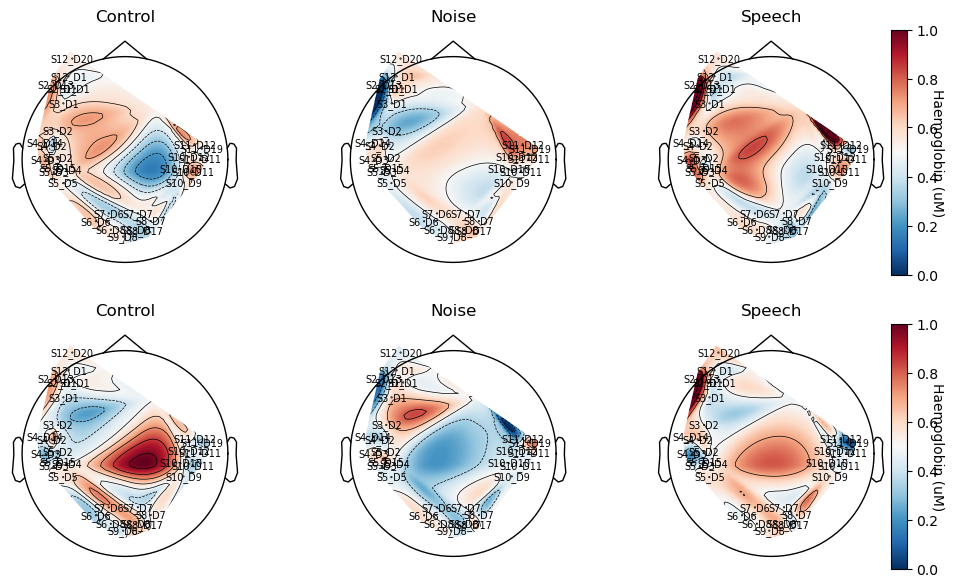

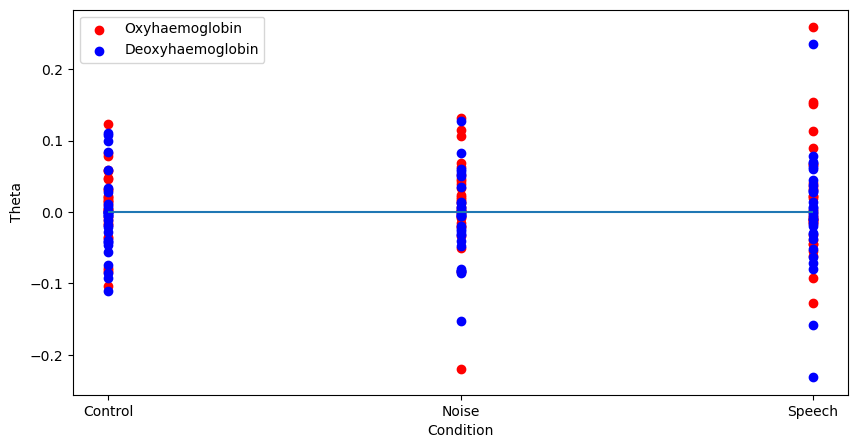

In [ ]:
glm_est.scatter()
plt.show()

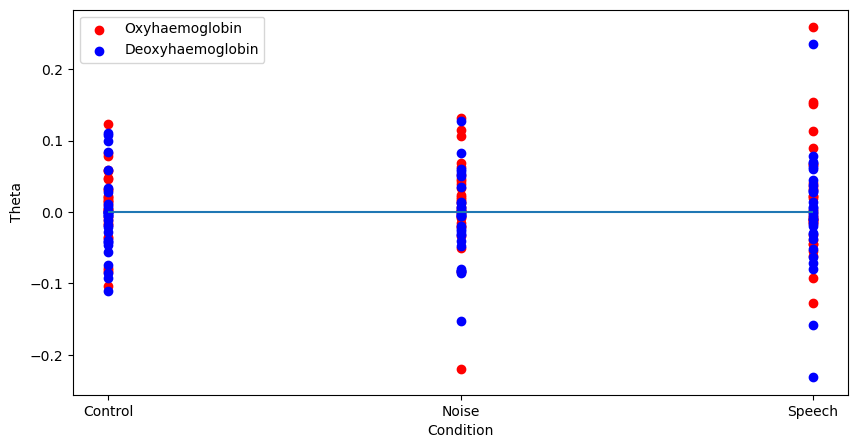

In [ ]:
glm_est.scatter(conditions=["Control", "Noise", "Speech"], )
plt.show()